Combined with phygenetic trees ,so we infer mixed isolates!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir("/Parastor300s_G30S/sunxh/MTB/v_snp2")

patient_infor = pd.read_excel("/Parastor300s_G30S/sunxh/MTB/v_snp2/population_infor.xlsx", skiprows = 10)
all_vsnp_filtered = pd.read_csv("all_vsnp_filtered.csv")
TIMEPOINT_DF_0_05 = pd.read_csv("TIMEPOINT_DF_0_05.csv")
mix_isolate_infor = pd.read_table("mix_isolate",header = None)
names = ['patient_id','stage','mix_infor']
mix_isolate_infor.columns = names
mix_isolate_infor.patient_id = mix_isolate_infor.patient_id.astype(int)
mix_isolate_infor.stage = mix_isolate_infor.stage.astype(int)
all_vsnp_filtered2 = pd.merge(all_vsnp_filtered,mix_isolate_infor,left_on=['patient_id','stage'],right_on=['patient_id','stage'], how='left')
all_vsnp_filtered2 = all_vsnp_filtered2[all_vsnp_filtered2.mix_infor=="No"]
TIMEPOINT_DF_0_05_filtered = pd.merge(TIMEPOINT_DF_0_05,mix_isolate_infor,left_on=['PATIENT_ID','TIME'],right_on=['patient_id','stage'], how='left')
TIMEPOINT_DF_0_05_filtered = TIMEPOINT_DF_0_05_filtered[TIMEPOINT_DF_0_05_filtered.mix_infor=="No"]

#patient_data2 = pd.DataFrame(patient_data_1bp)
#patient_data2.patient_id = patient_data2.patient_id.astype(int)
patient_infor.Case = patient_infor.Case.astype(int)
#patient_infor
TIMEPOINT_DF_0_05_filtered2 = pd.merge(TIMEPOINT_DF_0_05_filtered,patient_infor,left_on=['PATIENT_ID'],right_on=['Case'], how='left')
isolate_infor = pd.read_excel("/Parastor300s_G30S/sunxh/MTB/v_snp2/isolate_infor.xlsx")
TIMEPOINT_DF_0_05_filtered3 = pd.merge(TIMEPOINT_DF_0_05_filtered2,isolate_infor,left_on=['PATIENT_ID','TIME'],right_on=['Case','Isolate'], how='left')


In [6]:
# model = sm.MixedLM.from_formula('MEDIAN_FREQUENCY ~ DEPTH', 
#                                 data=TIMEPOINT_DF_0_05_filtered, 
#                                 groups=TIMEPOINT_DF_0_05_filtered['PATIENT_ID'])
# result = model.fit()
# print(result.summary())
# #print (result.pvalues[1])

# plt.figure(figsize=(10,6))
# plt.plot(np.arange(850), 
#          np.arange(850)*result.params[1]+result.params[0], 
#          'r:', 
#          label='slope = {0:0.3f}, p = {1:0.3f}'.format(result.params[1], 
#                                                      result.pvalues[1]))
# plt.legend(fontsize=14, loc=2)
# plt.plot(TIMEPOINT_DF_0_05_filtered.DEPTH, 
#          TIMEPOINT_DF_0_05_filtered.MEDIAN_FREQUENCY,  
#          'o', mec='black', mfc='none', ms=10)
# plt.ylim(0,1)
# plt.yticks(size=14)
# #plt.ylabel('Number of v-SNP', size=18)
# plt.xlim(0,850)
# plt.xticks(size=14)
# plt.xlabel('Coverage depth', size=18)

(0.0, 1.0)

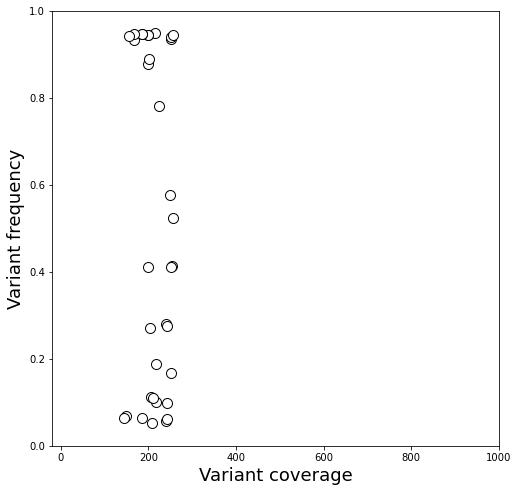

In [3]:
plt.figure(figsize=(8,8))
plt.plot(list(all_vsnp_filtered[(all_vsnp_filtered.patient_id==23)&(all_vsnp_filtered.stage==6)].coverage), 
         list(all_vsnp_filtered[(all_vsnp_filtered.patient_id==23)&(all_vsnp_filtered.stage==6)].frequency), 
         'o', mfc='white', mec='black', ms=10)
plt.ylabel('Variant frequency', size=18)
plt.xlabel('Variant coverage', size=18)
plt.xlim(-20,1000)
plt.ylim(0,1)

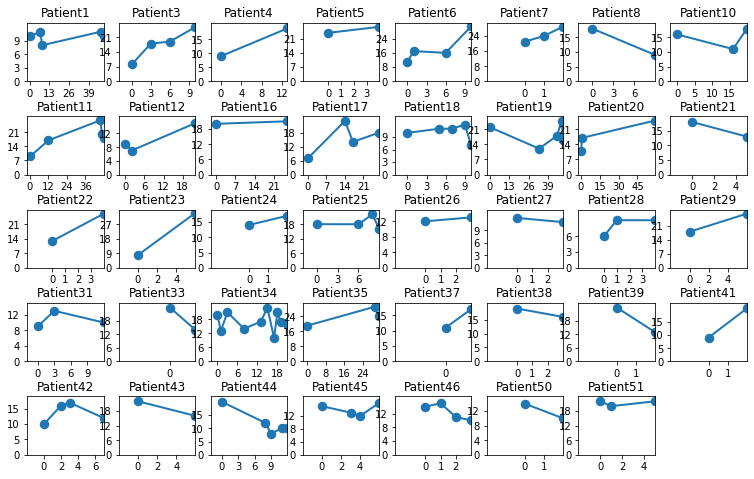

In [4]:
import math
plt.figure( figsize=(20,6))
n = 0
TIMEPOINT_DF_0_05_filtered5 = TIMEPOINT_DF_0_05_filtered2.sort_values(["PATIENT_ID", "TIME"])

for _patient in TIMEPOINT_DF_0_05_filtered5.PATIENT_ID.unique():
    n += 1
    _times = list(TIMEPOINT_DF_0_05_filtered5.TIME[TIMEPOINT_DF_0_05_filtered5.PATIENT_ID==_patient])
    _vSNP_counts = list(TIMEPOINT_DF_0_05_filtered5.vSNP_COUNT[TIMEPOINT_DF_0_05_filtered5.PATIENT_ID==_patient])
    plt.subplot(5,8,n)
    plt.title("Patient"+str(_patient))
    plt.plot(_times, _vSNP_counts, lw=2,marker='o',mew=1.5, ms=8)
    plt.ylim(0,max(_vSNP_counts)+2)
    plt.xlim(-2,max(_times))
    plt.xticks(np.arange(0, max(_times), step= math.ceil(max(_times)/4))) 
    plt.yticks(np.arange(0, max(_vSNP_counts), step= math.ceil(max(_vSNP_counts)/4))) 

plt.subplots_adjust(left=0.4,
                    bottom=2, 
                    right=0.9, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.6)
    

In [77]:
from scipy import stats
result = stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Phenotype==1].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Phenotype==0].vSNP_COUNT,alternative='two-sided')
result

#stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.phenotypic_INH_RIF_DR==1].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.phenotypic_INH_RIF_DR==3].vSNP_COUNT,alternative='two-sided')

#stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Rifampicin=="R"].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Rifampicin=="S"].vSNP_COUNT,alternative='two-sided')

#stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Ethambutol=="R"].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Ethambutol=="S"].vSNP_COUNT,alternative='two-sided')

#stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Previous_treatment=="Previously treated"].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Previous_treatment=="New patient"].vSNP_COUNT,alternative='two-sided')

#stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Diabetes_comorbidity=="No"].vSNP_COUNT,TIMEPOINT_DF_0_05_filtered3[TIMEPOINT_DF_0_05_filtered3.Diabetes_comorbidity=="Yes"].vSNP_COUNT,alternative='two-sided')

MannwhitneyuResult(statistic=826.5, pvalue=0.035841148043213)

In [11]:
import seaborn as sns
from statannot import add_stat_annotation

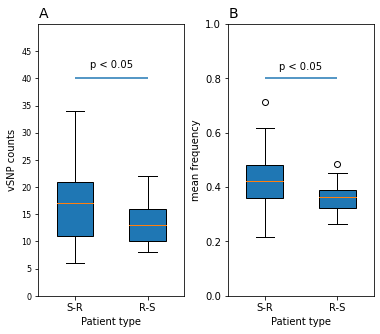

In [74]:
TIMEPOINT_DF_0_05_filtered4 = TIMEPOINT_DF_0_05_filtered3
TIMEPOINT_DF_0_05_filtered4.loc[TIMEPOINT_DF_0_05_filtered3['Phenotype']==1,'patient_type'] = "R-S"
TIMEPOINT_DF_0_05_filtered4.loc[TIMEPOINT_DF_0_05_filtered3['Phenotype']!=1,'patient_type'] = "S-R"

double_column_figure_r = (6.69,5)
tick_size = 8
label_size = 10
title_size = 10
text_size = 8
single_column_figure = (3.35,3.35)
double_column_figure_s = (6.69,6.69)

plt.figure('composite2', figsize=double_column_figure_r)

plt.subplot2grid((5,10), (0,0), rowspan=5, colspan=4) 
#plt.hlines(1,0,5, linestyles='dotted')
plt.boxplot([list(TIMEPOINT_DF_0_05_filtered4.vSNP_COUNT[TIMEPOINT_DF_0_05_filtered4.patient_type=="S-R"]), 
                   list(TIMEPOINT_DF_0_05_filtered4.vSNP_COUNT[TIMEPOINT_DF_0_05_filtered4.patient_type=="R-S"])
                   ],
                  patch_artist=True, widths=.5)
plt.xticks([1,2],['S-R','R-S'],size=label_size,rotation=0)
plt.ylabel('vSNP counts', size=label_size)
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5), np.arange(0,50,5), size=tick_size)
plt.hlines(40,1,2, linestyles='solid')
plt.text(1.5,42, 'p < 0.05', size=label_size, horizontalalignment='center')
plt.xlabel('Patient type', size=label_size)
plt.title('A', size=14, loc='left')

plt.subplot2grid((5,10), (0,5), rowspan=5, colspan=4)
plt.boxplot([list(TIMEPOINT_DF_0_05_filtered4.MEAN_FREQUENCY[TIMEPOINT_DF_0_05_filtered4.patient_type=="S-R"]), 
                   list(TIMEPOINT_DF_0_05_filtered4.MEAN_FREQUENCY[TIMEPOINT_DF_0_05_filtered4.patient_type=="R-S"])
                   ],
                  patch_artist=True, widths=.5)

plt.xticks([1,2],['S-R','R-S'],size=label_size,rotation=0)
plt.ylabel('mean frequency', size=label_size)
plt.ylim(0,1)
#plt.yticks(np.arange(0,1,0.2), np.arange(0,1,0.2), size=tick_size)
plt.hlines(0.8,1,2, linestyles='solid')
plt.text(1.5,0.83, 'p < 0.05', size=label_size, horizontalalignment='center')
plt.xlabel('Patient type', size=label_size)
plt.title('B', size=14, loc='left')
plt.savefig('/home2/sunxh/jupyter/vsnp.pdf')

In [71]:
os.getcwd()

'/Parastor300s_G30S/sunxh/MTB/v_snp2'

In [61]:
np.arange(0,1,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [49]:
stats.mannwhitneyu(TIMEPOINT_DF_0_05_filtered4.MEAN_FREQUENCY[TIMEPOINT_DF_0_05_filtered4.patient_type=="S-R"],TIMEPOINT_DF_0_05_filtered4.MEAN_FREQUENCY[TIMEPOINT_DF_0_05_filtered4.patient_type=="R-S"],alternative='two-sided')

MannwhitneyuResult(statistic=1644.0, pvalue=0.0013689077946705402)

In [45]:
TIMEPOINT_DF_0_05_filtered4

,Unnamed: 0,PATIENT_ID,TIME,MEAN_FREQUENCY,LOG_MEAN_FREQUENCY,MEDIAN_FREQUENCY,VARIANCE_FREQUENCY,vSNP_COUNT,DEPTH,Phenotype,...,Isolate,Streptomycin,Isoniazid,Rifampicin,Ethambutol,Ofloxacin,Kanamycin,line_Isoniazid,line_Rifampicin,patient_type
0,0,10,0,0.325025,-1.123855,0.193588,0.075047,16,227.583294,0,...,0,R,S,R,R,R,R,R,R,S-R
1,1,10,16,0.403231,-0.908246,0.391837,0.068940,11,247.296005,0,...,16,R,R,R,R,R,R,R,R,S-R
2,2,10,20,0.374565,-0.981991,0.292347,0.104485,18,515.892210,0,...,20,R,R,R,R,R,R,R,R,S-R
3,3,11,0,0.617014,-0.482863,0.733333,0.064035,9,84.636268,0,...,0,S,S,S,S,S,S,R,S,S-R
4,4,11,12,0.420357,-0.866650,0.251799,0.089573,17,151.904189,0,...,12,R,R,S,S,S,S,R,S,S-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,144,7,0,0.494064,-0.705090,0.463277,0.117510,21,145.908753,0,...,0,S,S,S,S,S,S,S,S,S-R
119,145,7,1,0.549122,-0.599435,0.647010,0.129559,24,100.879037,0,...,1,S,S,R,S,S,S,S,S,S-R
120,146,7,2,0.478542,-0.737012,0.437500,0.117077,29,156.505400,0,...,2,S,S,R,R,S,S,S,S,S-R
121,147,8,0,0.545865,-0.605383,0.485077,0.103744,18,72.917518,0,...,0,S,S,S,S,S,S,S,S,S-R


In [25]:
np.arange(0,4,.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

Text(0.5, 30, 'pvalue < 0.05')

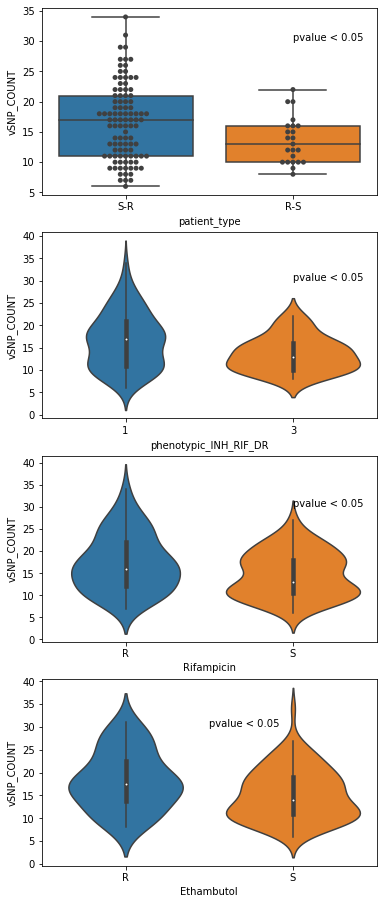

In [10]:
import seaborn as sns
TIMEPOINT_DF_0_05_filtered4 = TIMEPOINT_DF_0_05_filtered3
TIMEPOINT_DF_0_05_filtered4.loc[TIMEPOINT_DF_0_05_filtered3['Phenotype']==1,'patient_type'] = "R-S"
TIMEPOINT_DF_0_05_filtered4.loc[TIMEPOINT_DF_0_05_filtered3['Phenotype']!=1,'patient_type'] = "S-R"
plt.figure(figsize=(6,24))
plt.subplot(6,1,1)
sns.boxplot(x='patient_type',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
sns.swarmplot(x='patient_type',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4,color=".25")
plt.text(1,30,"pvalue < 0.05")
plt.subplot(6,1,2)
sns.violinplot(x='phenotypic_INH_RIF_DR',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
plt.text(1,30,"pvalue < 0.05")
plt.subplot(6,1,3)
sns.violinplot(x='Rifampicin',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
plt.text(1,30,"pvalue < 0.05")
#plt.subplot(6,1,4)
#sns.violinplot(x='Previous_treatment',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
#plt.text(0.5,30,"pvalue < 0.05")
plt.subplot(6,1,4)
sns.violinplot(x='Ethambutol',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
plt.text(0.5,30,"pvalue < 0.05")
#plt.subplot(6,1,6)
#sns.violinplot(x='Diabetes_comorbidity',y='vSNP_COUNT',data=TIMEPOINT_DF_0_05_filtered4)
#plt.text(0.5,30,"pvalue < 0.05")

(0.0, 1.0)

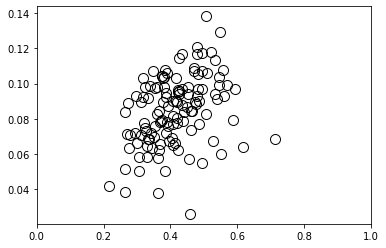

In [16]:
plt.plot(TIMEPOINT_DF_0_05_filtered3.MEAN_FREQUENCY, 
         TIMEPOINT_DF_0_05_filtered3.VARIANCE_FREQUENCY,  
         'o', mec='black', mfc='none', ms=10)
plt.xlim(0,1)

In [18]:
all_vsnp_filtered2.to_csv("all_vsnp_final.csv")

In [17]:
all_vsnp_filtered2

,Unnamed: 0,locus,ref_base,alt_base,frequency,coverage,patient_id,stage,codon_number,anocid_type,...,condon_change,genes,gene_name,description,gene_type,mean_depth,std_depth,max_depth_cutoff,min_depth_cutoff,mix_infor
0,1294,775655,A,T,0.068627,204,10,0,942,Synonymous,...,GTT-GTA,Rv0676c,mmpL5,transmembrane transport protein MmpL5,protein_coding,227.583294,54.469411,272.840887,137.068110,No
1,1295,1094375,C,G,0.314159,226,10,0,-,---,...,-19-295-,Rv0978c-Rv0979c,PE_PGRS17-Rv0979c,PE-PGRS family protein PE_PGRS17##hypothetical...,protein_coding##protein_coding,227.583294,54.469411,272.840887,137.068110,No
2,1296,1443428,G,A,0.409594,271,10,0,-,---,...,+29-54-,Rv1289-Rv1290c,Rv1289-Rv1290c,hypothetical protein##hypothetical protein,protein_coding##protein_coding,227.583294,54.469411,272.840887,137.068110,No
3,1298,2030848,A,G,0.114583,192,10,0,52,Nonsynonymous,...,GAG-GGG,Rv1793,esxN,ESAT-6 like protein EsxN,protein_coding,227.583294,54.469411,272.840887,137.068110,No
4,1299,2296181,A,G,0.713542,192,10,0,3602,Synonymous,...,GGT-GGC,Rv2048c,pks12,polyketide synthase,protein_coding,227.583294,54.469411,272.840887,137.068110,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,199694,2945004,C,G,0.185950,242,8,9,-,---,...,-19-326+,Rv2615c-Rv2616,PE_PGRS45-Rv2616,PE-PGRS family protein PE_PGRS45##hypothetical...,protein_coding##protein_coding,268.437795,77.746475,317.590009,170.133367,No
3705,199695,2945101,A,G,0.115538,251,8,9,-,---,...,-116-229+,Rv2615c-Rv2616,PE_PGRS45-Rv2616,PE-PGRS family protein PE_PGRS45##hypothetical...,protein_coding##protein_coding,268.437795,77.746475,317.590009,170.133367,No
3706,199697,3232703,G,A,0.495968,248,8,9,-,---,...,-197-168-,Rv2920c-Rv2921c,amt-ftsY,ammonium transporter integral membrane protein...,protein_coding##protein_coding,268.437795,77.746475,317.590009,170.133367,No
3707,199698,3232759,G,A,0.940559,286,8,9,-,---,...,-253-112-,Rv2920c-Rv2921c,amt-ftsY,ammonium transporter integral membrane protein...,protein_coding##protein_coding,268.437795,77.746475,317.590009,170.133367,No


(0.0, 1.0)

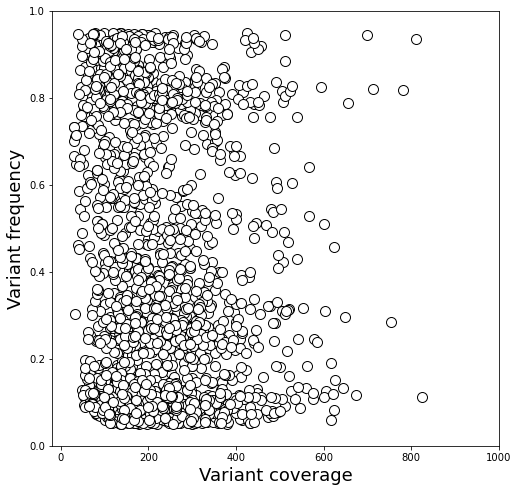

In [19]:
plt.figure(figsize=(8,8))
plt.plot(list(all_vsnp_filtered2.coverage), 
         list(all_vsnp_filtered2.frequency), 
         'o', mfc='white', mec='black', ms=10)
plt.ylabel('Variant frequency', size=18)
plt.xlabel('Variant coverage', size=18)
plt.xlim(-20,1000)
plt.ylim(0,1)